In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, stats
import sdeint

In [29]:
def funct_ode(y,t,pars):
    x = y[0]
    a = y[1]
    dxdt = x*(1 - x)*(pars['e']*pars['p']*pars['cd']*(1 - pars['d']*x) - pars['cn']*(1 - a))
    dadt = pars['gamma']*a*(1 - a)*(2*x - 1)
    dydt = np.array([dxdt,dadt])
    return dydt

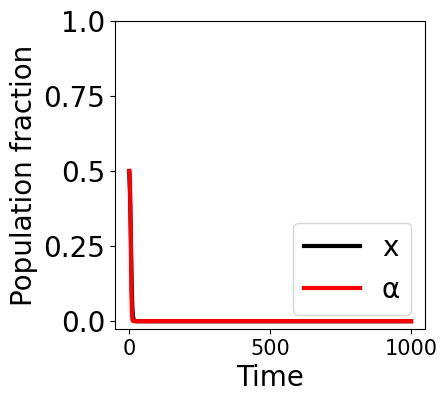

In [30]:
# Parameters
pars = {}  # initiate parameter dictionary
pars['p'] = 0.5
pars['cd'] = 1
pars['e'] = 0.9
pars['d'] = 0.5
pars['cn'] = 0.9
pars['gamma'] = 1

# Initial conditions
c0 =  0.5   #initial fraction of cooperators 
a0 =  0.5   #initial alpha mean 
y0 = np.array([c0,a0])
t = np.linspace(0,1000,1000)

# Simulate
int_y = integrate.odeint(funct_ode,y0,t,args=(pars,))

# Visualize
fig1,ax = plt.figure(figsize=(4, 4)), plt.axes()
plt.plot(t,int_y[:,0],linewidth=3,color='k')
plt.plot(t,int_y[:,1],linewidth=3,color='r')

plt.xlabel('Time',fontsize=20)
plt.ylabel('Population fraction',fontsize=20)
ax.tick_params(labelsize=15) 
ax.set_yticks(np.linspace(0,1,5))
ax.set_yticklabels(np.linspace(0,1,5).round(decimals=2),fontsize=20) 
plt.legend(['x','α'],fontsize=20,loc='lower right')
plt.show()

In [40]:
# Define the system of ODEs
def funct(y, t):
    # Define the deterministic part of the system of ODEs
    # This function should return the derivatives of y with respect to t based on the current state of the system
    x = y[0]
    a = y[1]
    tanh_input = pars['beta']/2*(pars['e']*pars['p']*pars['cd']*(1 - pars['d']*x) - pars['cn']*(1 - a))
    dxdt = x*(1 - x)*tanh_input
    dadt = pars['gamma']*a*(1 - a)*(2*x - 1)
    dydt = np.array([dxdt,dadt])
    return dydt

# Define the noise term
def noise_func(y, t):
    # Define the noise term matrix of shape (2, m) where m is the number of time points
    x = y[0]
    noise_term1 = np.sqrt(np.abs(x*(1-x)/pars['N']))*np.random.normal(0, 1, size=100)
    noise_term2 = np.zeros(100)
    return np.array([noise_term1,noise_term2])

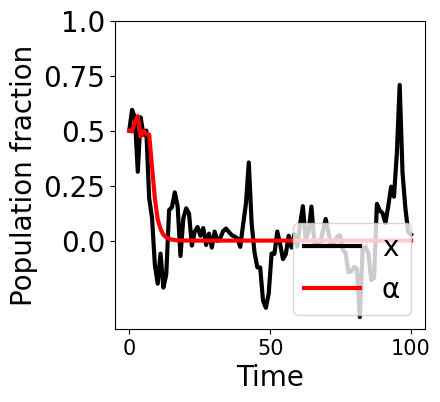

In [44]:
# Parameters
pars = {}  # initiate parameter dictionary
pars['p'] = 0.5
pars['cd'] = 1
pars['e'] = 0.9
pars['d'] = 0.5
pars['cn'] = 0.9
pars['gamma'] = 1
pars['beta']=1
pars['N']=1000

# Initial conditions
c0 = 0.5   # initial fraction of cooperators
a0 = 0.5   # initial alpha mean
y0 = np.array([c0, a0])
t = np.linspace(0, 100, 100)

# Simulate
int_y = sdeint.itoint(funct, noise_func, y0, t)

# Visualize
fig1, ax = plt.subplots(figsize=(4, 4))
plt.plot(t, int_y[:, 0], linewidth=3, color='k')
plt.plot(t, int_y[:, 1], linewidth=3, color='r')

plt.xlabel('Time', fontsize=20)
plt.ylabel('Population fraction', fontsize=20)
ax.tick_params(labelsize=15)
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels(np.linspace(0, 1, 5).round(decimals=2), fontsize=20)
plt.legend(['x', 'α'], fontsize=20, loc='lower right')
plt.show()

In [26]:
funct(np.array([0.9, 0.1]),t)

array([-0.009,  0.072])